# Exploratory Analysis

In [59]:
import pathlib
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [60]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
processed_file_path = DATA_DIR / 'processed' / 'ames_with_correct_types.pkl'

with open(processed_file_path, 'rb') as file:
    (
        data,
        continuous_variables,
        discrete_variables,
        ordinal_variables,
        categorical_variables,
    ) = pickle.load(file)

### Price Outliers

<Axes: xlabel='Price', ylabel='Count'>

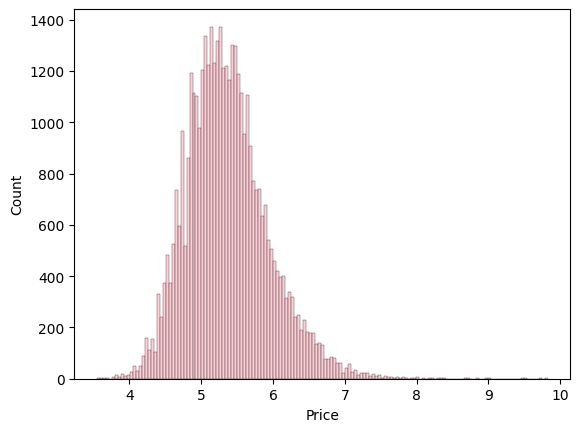

In [62]:
sns.histplot(np.log(data['Price']), color = 'pink')

In [4]:
data['Price'].describe()

count    41714.000000
mean       260.094423
std        279.408493
min         34.779339
25%        144.016085
50%        203.819274
75%        297.373358
max      18545.450285
Name: Price, dtype: float64

## Treating Price Outliers 

In [56]:
q1=data['Price'].quantile(.25)
q2=data['Price'].quantile(.50)
q3=data['Price'].quantile(.75)
iqr=q3-q1
print('first quartile is %.1f'%q1)
print('second quartile is %.1f'%q2)
print('third quartile is %.1f'%q3)
print('interquartile range is %.1f'%iqr)

limit_low=q1-iqr*1.999
limit_high=q3+iqr*1.999
print('lower limit is %.1f'%limit_low)
print('upper limit is %.1f'%limit_high)

first quartile is 139.8
second quartile is 196.6
third quartile is 278.0
interquartile range is 138.2
lower limit is -136.4
upper limit is 554.2


In [9]:
data = data[data['Price'] < limit_high].copy()

<Axes: xlabel='Price', ylabel='Count'>

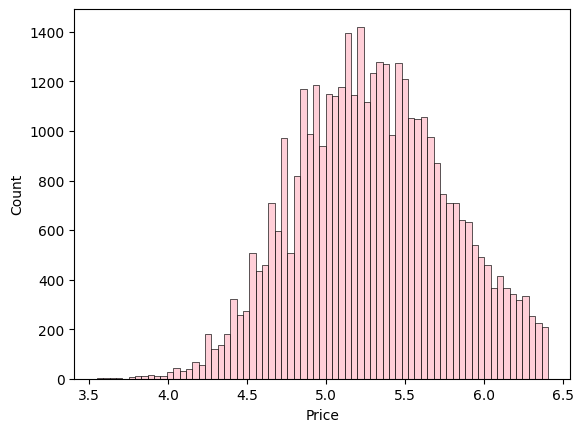

In [10]:
sns.histplot(np.log(data['Price']), color = 'pink')

## Discrepancies in the price of cities

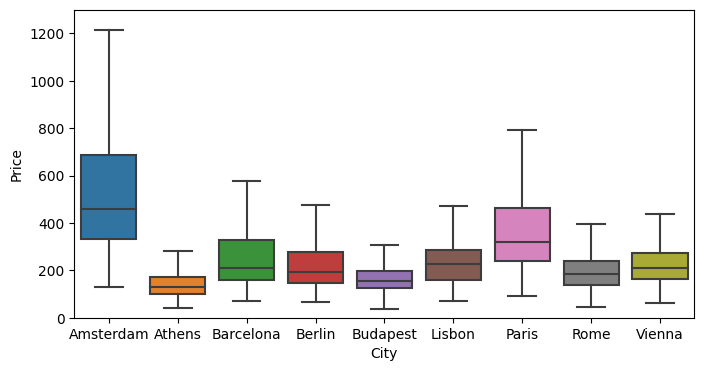

In [63]:
fig, ax = plt.subplots(1)
fig.set_size_inches(8,4)
sns.boxplot(data = data, x='City', y='Price',showfliers = False)
ax.set_ylim([0,1300])
plt.show()

Text(0.5, 1.0, 'City Count')

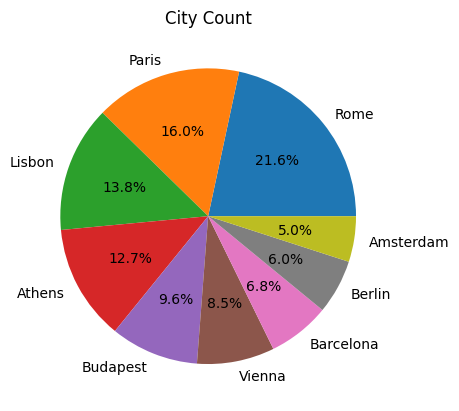

In [72]:
count_city = data['City'].value_counts()
plt.pie(count_city, labels = count_city.index, autopct='%1.1f%%')
plt.title('City Count')

In [65]:
data['City'].value_counts()

Rome         9027
Paris        6688
Lisbon       5763
Athens       5280
Budapest     4022
Vienna       3537
Barcelona    2833
Berlin       2484
Amsterdam    2080
Name: City, dtype: int64

## Analyzing each county separately

In [66]:
data_amsterdam = data.loc[data['City'] == 'Amsterdam'].copy()
data_athens = data.loc[data['City'] == 'Athens'].copy()
data_paris = data.loc[data['City'] == 'Paris'].copy()

### Amsterdam City

##### Treating Price Outliers 

<Axes: xlabel='Price', ylabel='Count'>

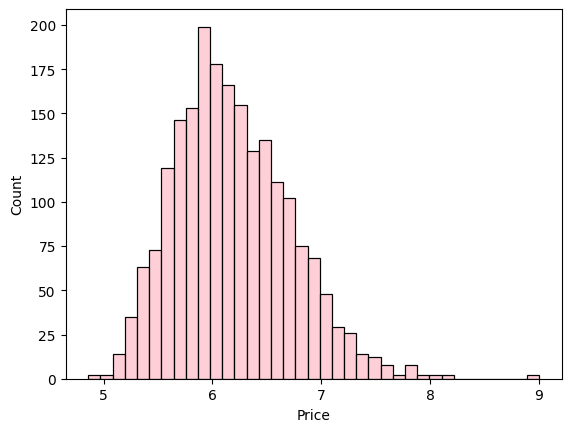

In [68]:
sns.histplot(np.log(data_amsterdam['Price']), color = 'pink')

In [69]:
q1=data_amsterdam['Price'].quantile(.25)
q2=data_amsterdam['Price'].quantile(.50)
q3=data_amsterdam['Price'].quantile(.75)
iqr=q3-q1
print('first quartile is %.1f'%q1)
print('second quartile is %.1f'%q2)
print('third quartile is %.1f'%q3)
print('interquartile range is %.1f'%iqr)

limit_low=q1-iqr*1.999
limit_high=q3+iqr*1.999
print('lower limit is %.1f'%limit_low)
print('upper limit is %.1f'%limit_high)

first quartile is 331.8
second quartile is 460.2
third quartile is 686.4
interquartile range is 354.6
lower limit is -377.1
upper limit is 1395.3


In [70]:
data_amsterdam = data_amsterdam[data_amsterdam['Price'] < limit_high].copy()

#Airbnb in que first quartile (below 25%)
q1_amsterdam = data_amsterdam[data_amsterdam['Price'] < q1].copy()
#Airbnb in que third quartile (above 75%)
q3_amsterdam = data_amsterdam[data_amsterdam['Price'] > q3].copy()

<Axes: xlabel='Price', ylabel='Count'>

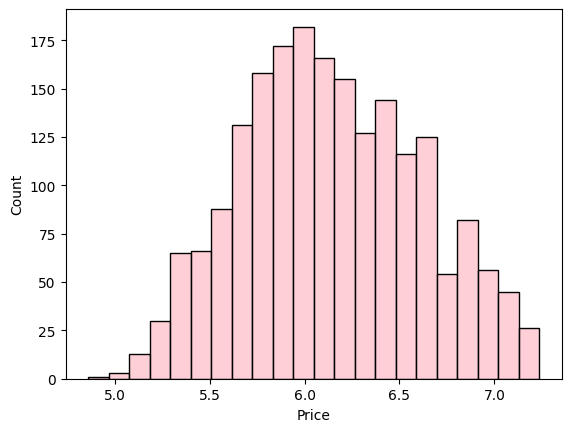

In [71]:
sns.histplot(np.log(data_amsterdam['Price']), color = 'pink')

### Athens City

##### Treating Price Outliers 

<Axes: xlabel='Price', ylabel='Count'>

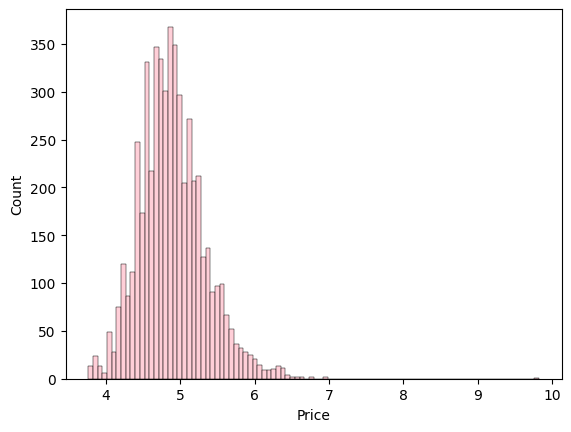

In [73]:
sns.histplot(np.log(data_athens['Price']), color = 'pink')

In [74]:
q1=data_athens['Price'].quantile(.25)
q2=data_athens['Price'].quantile(.50)
q3=data_athens['Price'].quantile(.75)
iqr=q3-q1
print('first quartile is %.1f'%q1)
print('second quartile is %.1f'%q2)
print('third quartile is %.1f'%q3)
print('interquartile range is %.1f'%iqr)

limit_low=q1-iqr*1.999
limit_high=q3+iqr*1.999
print('lower limit is %.1f'%limit_low)
print('upper limit is %.1f'%limit_high)

first quartile is 98.7
second quartile is 127.7
third quartile is 171.5
interquartile range is 72.9
lower limit is -47.0
upper limit is 317.2


In [75]:
data_athens = data_athens[data_athens['Price'] < limit_high].copy()

#Airbnb in que first quartile (below 25%)
q1_athens = data_athens[data_athens['Price'] < q1].copy()
#Airbnb in que third quartile (above 75%)
q3_athens = data_athens[data_athens['Price'] > q3].copy()

<Axes: xlabel='Price', ylabel='Count'>

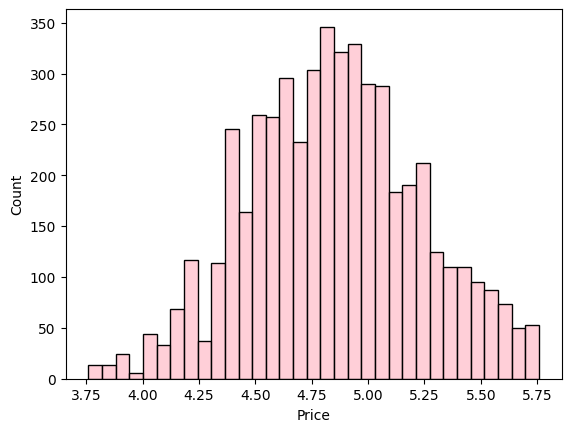

In [77]:
sns.histplot(np.log(data_athens['Price']), color = 'pink')

___________________________________________________________________

In [46]:
def plot_categoricals(data, cols, sorted=True):
    summary = data[cols] \
        .describe() \
        .transpose() \
        .sort_values(by='count')

    print(summary)

    for k, (col, val) in enumerate(summary['count'].items()):
        plt.figure()
        ser = data[col].value_counts()
        if sorted:
            ser = ser.sort_values()
        else:
            ser = ser.sort_index()
        ax = ser.plot.barh(color='pink')
        for container in ax.containers:
            ax.bar_label(container)
        plt.title(f'{col}, n={int(val)}')
        plt.show()

             count unique           top  freq
City          1392      1     Amsterdam  1392
Day           1392      2       Weekday   768
Room Type     1392      3  Private room   846
Shared Room   1392      2         False  1382
Private Room  1392      2          True   846
Superhost     1392      2         False   969


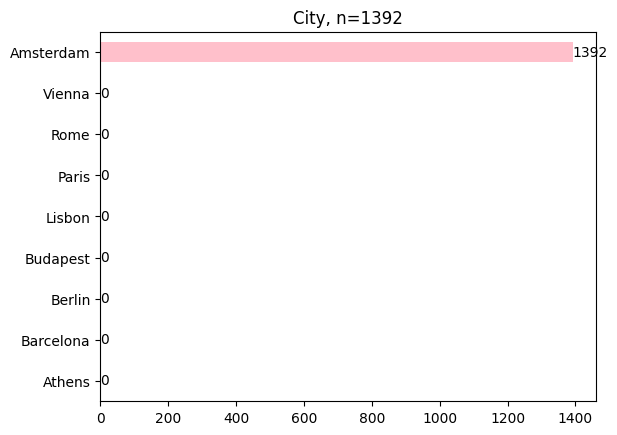

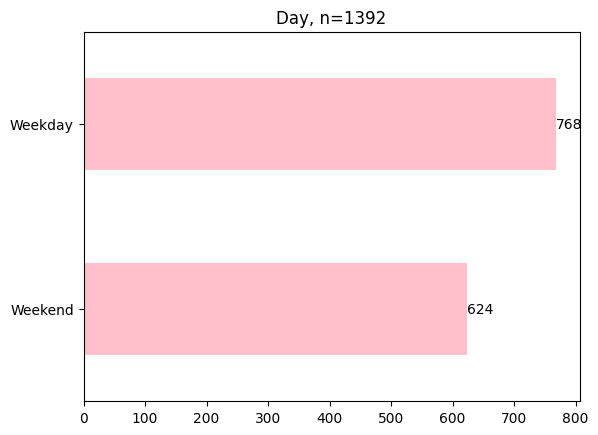

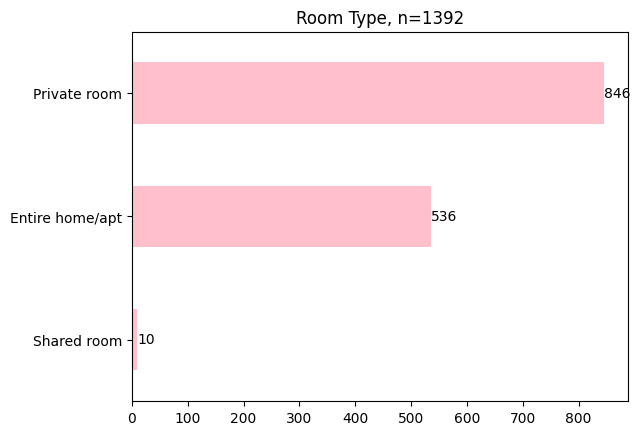

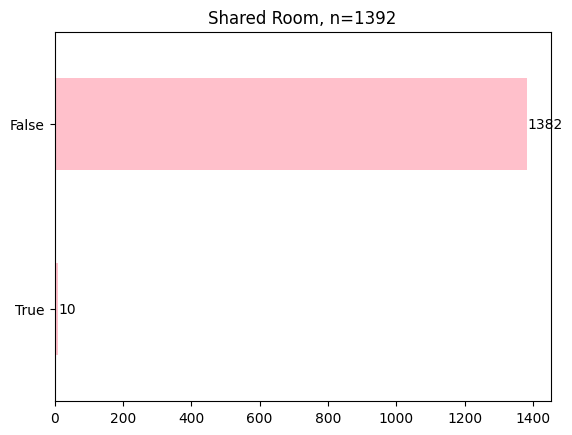

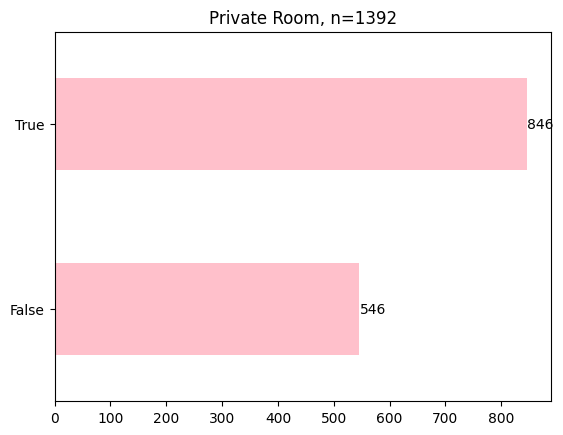

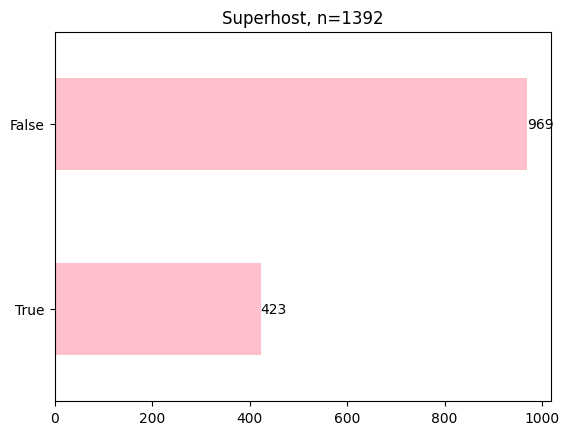

In [47]:
plot_categoricals(data_amsterdam, categorical_variables)

In [52]:
# funcao para plotar as continuos_variables 
def plot_continuous(data, cols):
    for col in cols:
        plt.figure()
        sns.distplot(data[col], color='orange')
        plt.title(col)
        plt.show()

C:\Users\sarah\AppData\Local\Temp\ipykernel_20396\2346373281.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], color='orange')


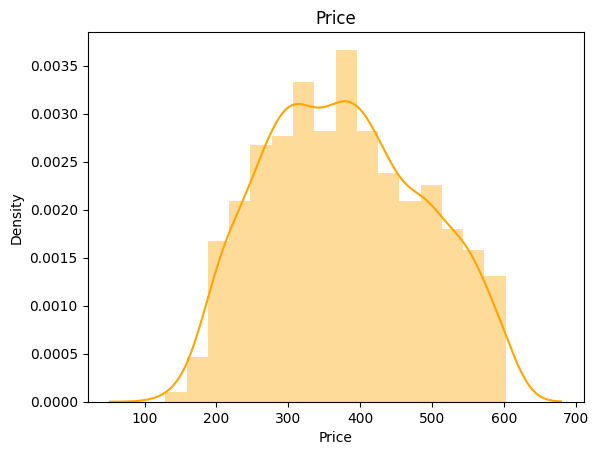

C:\Users\sarah\AppData\Local\Temp\ipykernel_20396\2346373281.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], color='orange')


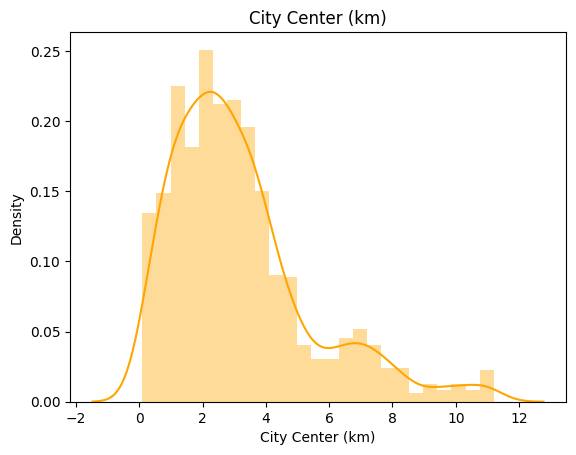

C:\Users\sarah\AppData\Local\Temp\ipykernel_20396\2346373281.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], color='orange')


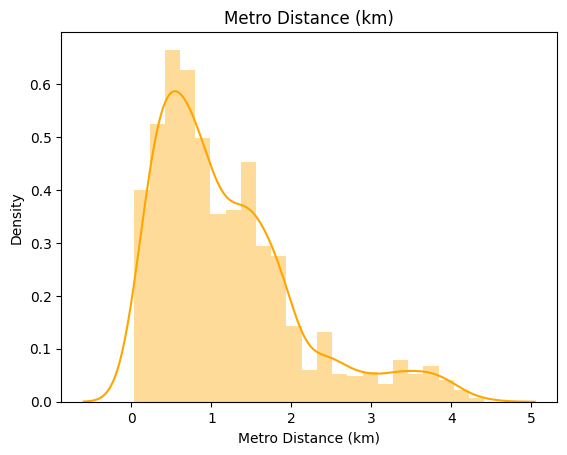

C:\Users\sarah\AppData\Local\Temp\ipykernel_20396\2346373281.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], color='orange')


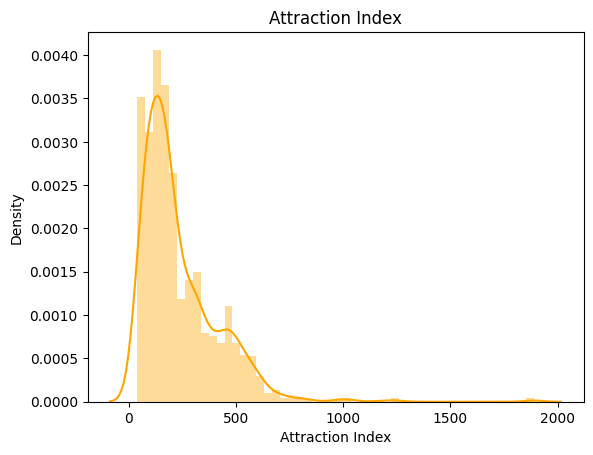

C:\Users\sarah\AppData\Local\Temp\ipykernel_20396\2346373281.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], color='orange')


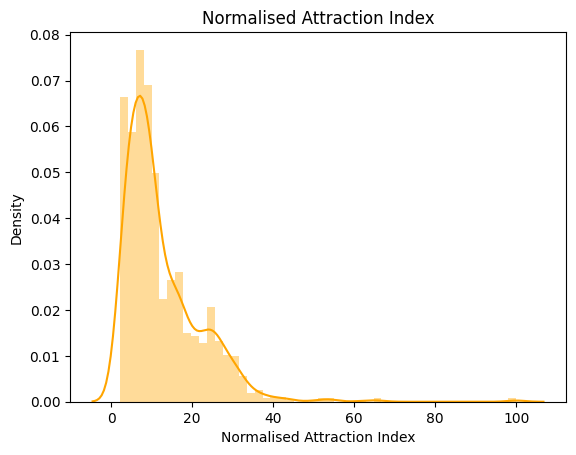

C:\Users\sarah\AppData\Local\Temp\ipykernel_20396\2346373281.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], color='orange')


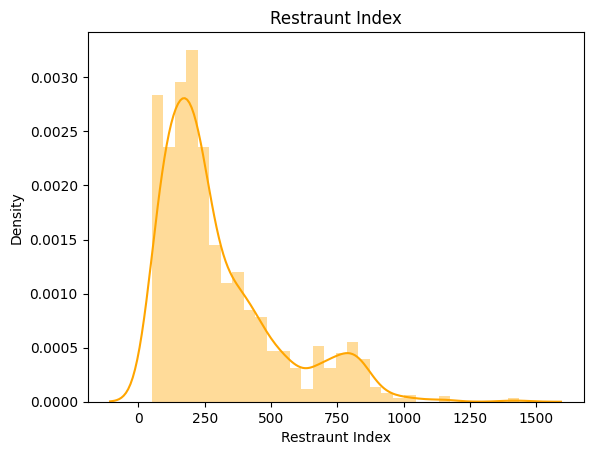

C:\Users\sarah\AppData\Local\Temp\ipykernel_20396\2346373281.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], color='orange')


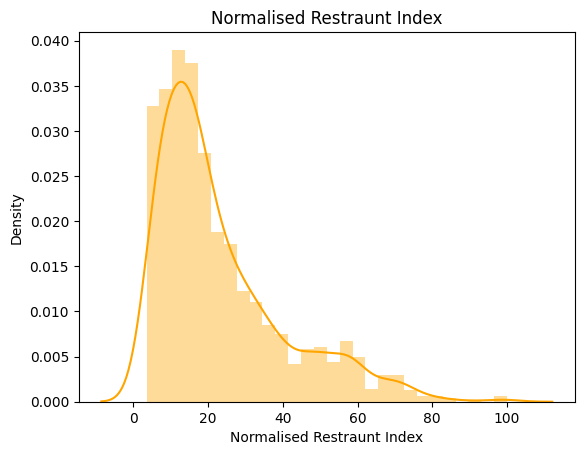

In [53]:
plot_continuous(data_amsterdam, continuous_variables)

referencias

https://support.minitab.com/pt-br/minitab/21/help-and-how-to/graphs/boxplot/interpret-the-results/quartiles/ 